In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [2]:
data=pd.read_csv("/home/deepanshu/Documents/all/predict_breast/demo/data.csv")

In [3]:
data.shape

(569, 33)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df=data.drop('Unnamed: 32',axis=1)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.disgnosis=df.diagnosis.astype('category')

<ipython-input-8-2ff35d265a29>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.disgnosis=df.diagnosis.astype('category')


In [9]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']
col=x.columns

In [10]:
col

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
#feature engineering and data cleaning
x.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
#normalization and features scaling
#mean normalization technique

df_norm=(x-x.mean())/(x.max()-x.min())
df_norm=pd.concat([df_norm,y],axis=1)

In [13]:
df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


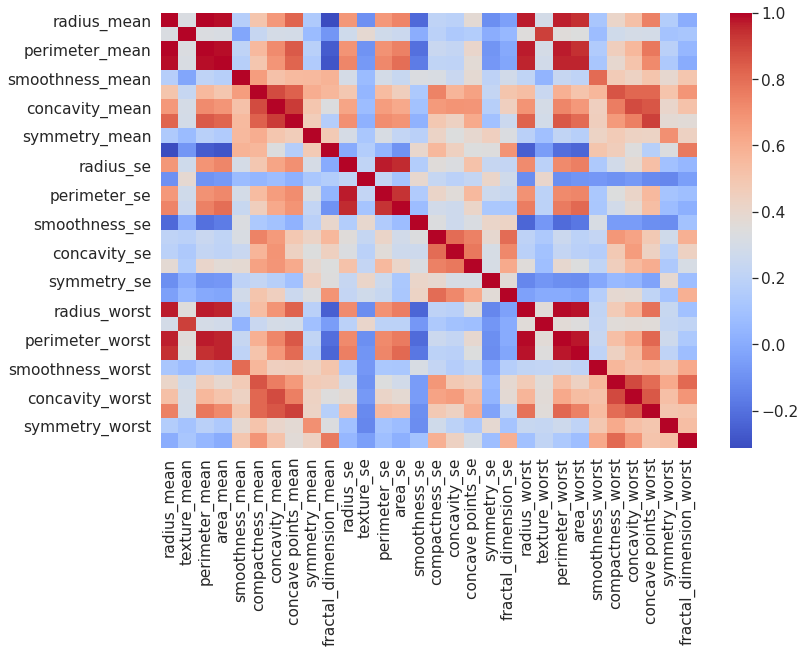

In [14]:
#visulization

#corelation between columns
plt.rcParams['figure.figsize']=(12,8)
sns.set(font_scale=1.4)
sns.heatmap(df.drop('diagnosis',axis=1).drop('id',axis=1).corr(),cmap='coolwarm')

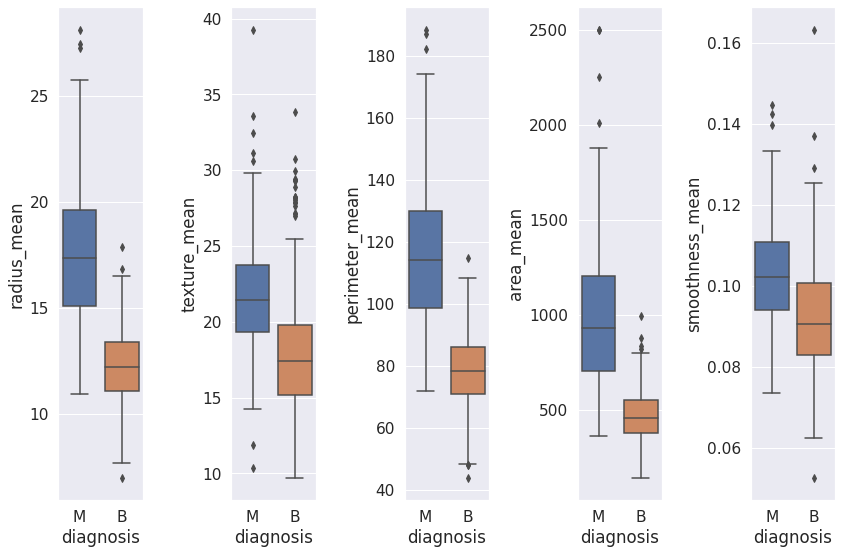

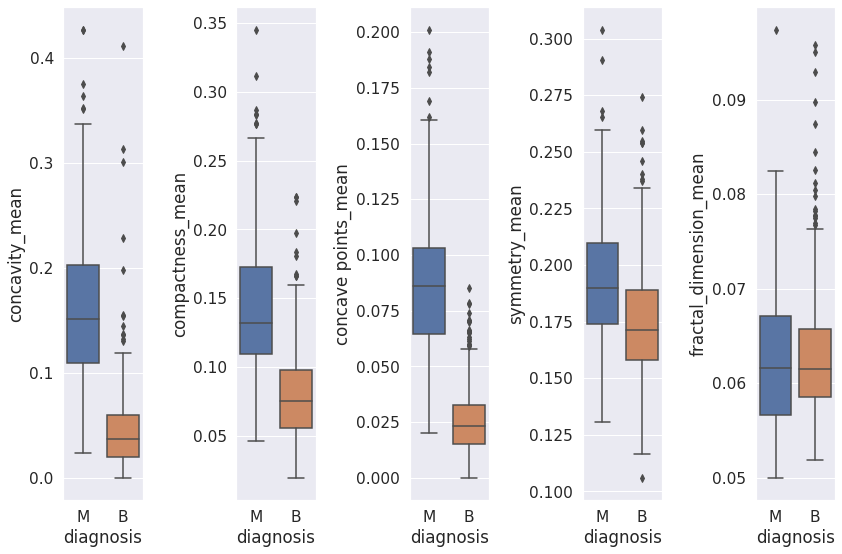

In [15]:
plt.rcParams['figure.figsize']=(12,8)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concavity_mean',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concave points_mean',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=df,ax=ax5)
f.tight_layout()


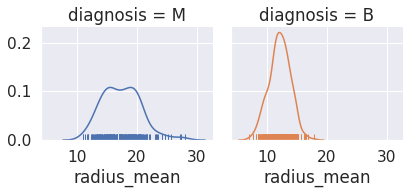

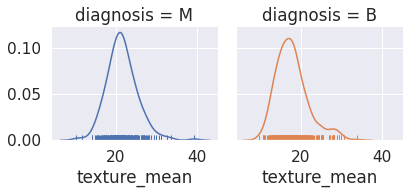

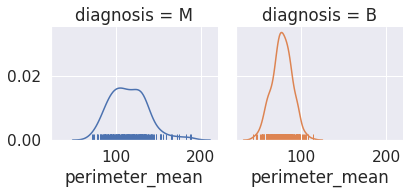

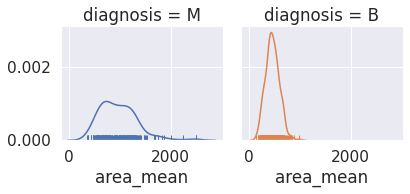

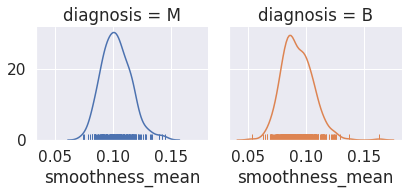

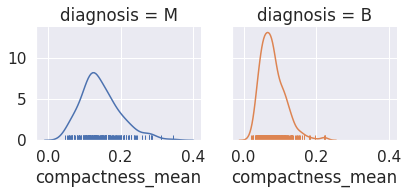

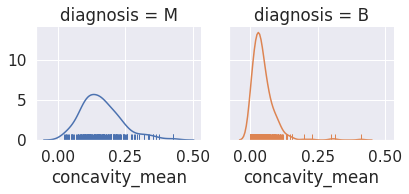

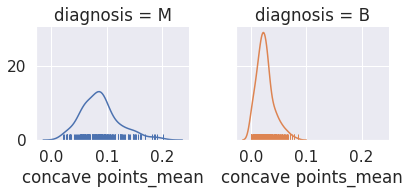

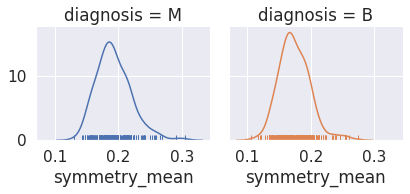

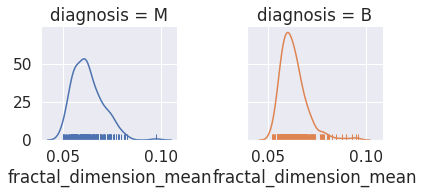

In [16]:
g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'radius_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'texture_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'perimeter_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'area_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'smoothness_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'compactness_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'concavity_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'concave points_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'symmetry_mean',hist=False,rug=True)

g=sns.FacetGrid(df,col='diagnosis',hue='diagnosis')
g.map(sns.distplot,'fractal_dimension_mean',hist=False,rug=True)

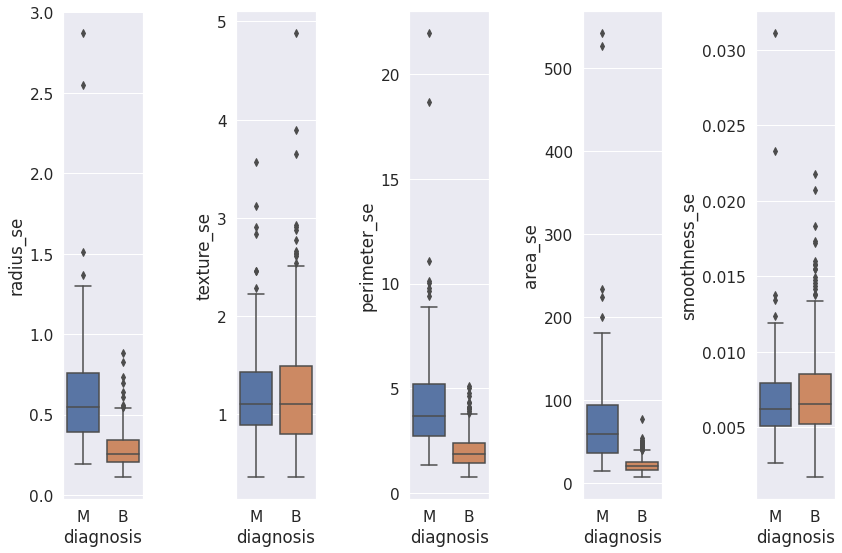

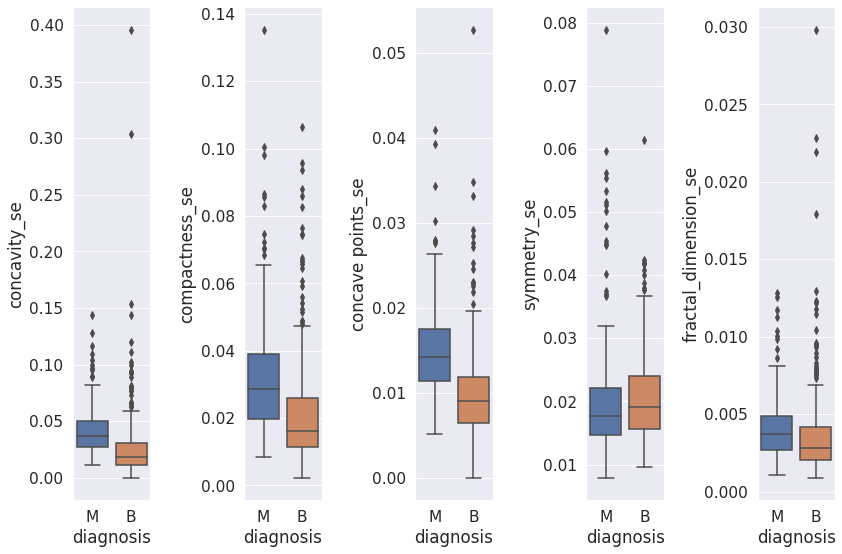

In [17]:
plt.rcParams['figure.figsize']=(12,8)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_se',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_se',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_se',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_se',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_se',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_se',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concavity_se',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concave points_se',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_se',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_se',data=df,ax=ax5)
f.tight_layout()

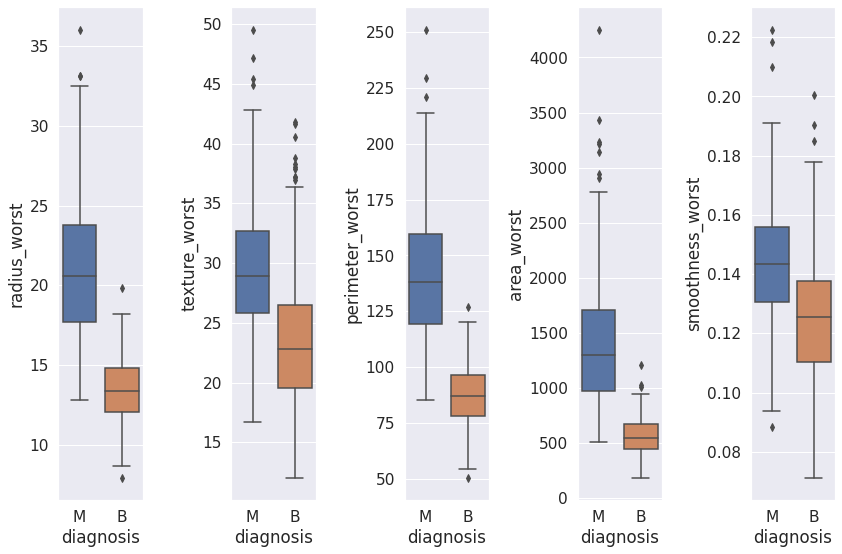

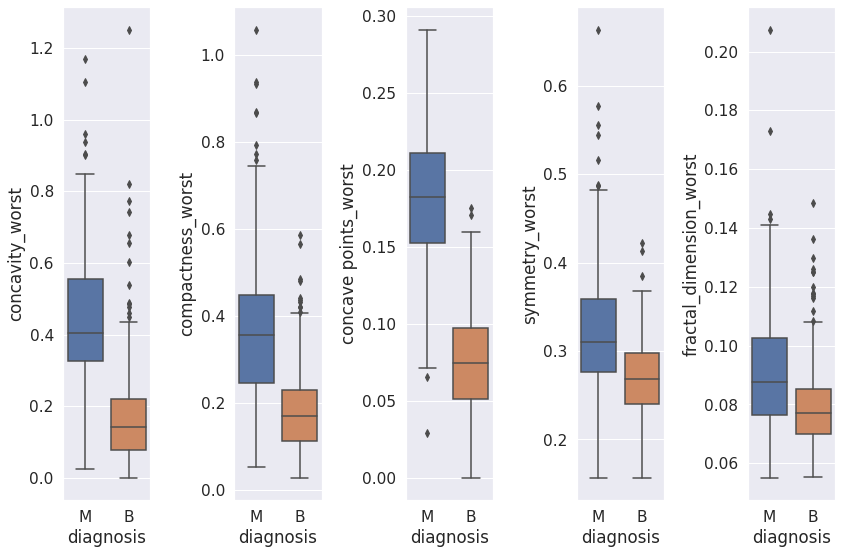

In [18]:
plt.rcParams['figure.figsize']=(12,8)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_worst',data=df,ax=ax1)
sns.boxplot('diagnosis',y='texture_worst',data=df,ax=ax2)
sns.boxplot('diagnosis',y='perimeter_worst',data=df,ax=ax3)
sns.boxplot('diagnosis',y='area_worst',data=df,ax=ax4)
sns.boxplot('diagnosis',y='smoothness_worst',data=df,ax=ax5)
f.tight_layout()

f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_worst',data=df,ax=ax2)
sns.boxplot('diagnosis',y='concavity_worst',data=df,ax=ax1)
sns.boxplot('diagnosis',y='concave points_worst',data=df,ax=ax3)
sns.boxplot('diagnosis',y='symmetry_worst',data=df,ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_worst',data=df,ax=ax5)
f.tight_layout()

In [19]:
x_norm=df_norm.drop(labels='diagnosis',axis=1)
y_norm=df_norm['diagnosis']
col=x_norm.columns

le=LabelEncoder()
le.fit(y_norm)
y_norm=le.transform(y_norm)

In [20]:
y_norm=pd.DataFrame(y_norm)
y_norm.head()

,0
0,1
1,1
2,1
3,1
4,1


In [50]:
#functionalize the mL model
def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    
    #in order to fine tune the parameters and get the best based on the scoring(recoll,accuracy....etc)
    grid=GridSearchCV(
    estimator=algorithm,
    param_grid=gridSearchParams,
    cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
    
    grid_result=grid.fit(x_train,y_train)
    best_params=grid_result.best_params_
    pred=grid_result.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print("Best Params : ",best_params)
    print("Classification_report : ",classification_report(y_test,pred))
    print("Accuracy_score : "+ str(accuracy_score(y_test,pred)))
    print("Confusion Matrix : \n",cm)

In [22]:
#svm model 
param={  
    
            'C':[0.1,1,100,1000],
            'gamma':[0.0001,0.001,0.1,1,3,5]
    
        
       }

FitModel(x_norm,y_norm,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.6s


Best Params :  {'C': 1, 'gamma': 1}
Classification_report :                precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Accuracy_score : 0.9736842105263158
Confusion Matrix : 
 [[72  3]
 [ 0 39]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.8s finished
/home/deepanshu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
np.random.seed(10)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
forest=RandomForestClassifier(n_estimators=1000)
fit=forest.fit(x_train,y_train)
accuracy=fit.score(x_test,y_test)
pred=fit.predict(x_test)
cmatrix=confusion_matrix(y_test,pred)
print("Accuracy : ",accuracy)

Accuracy :  0.9824561403508771


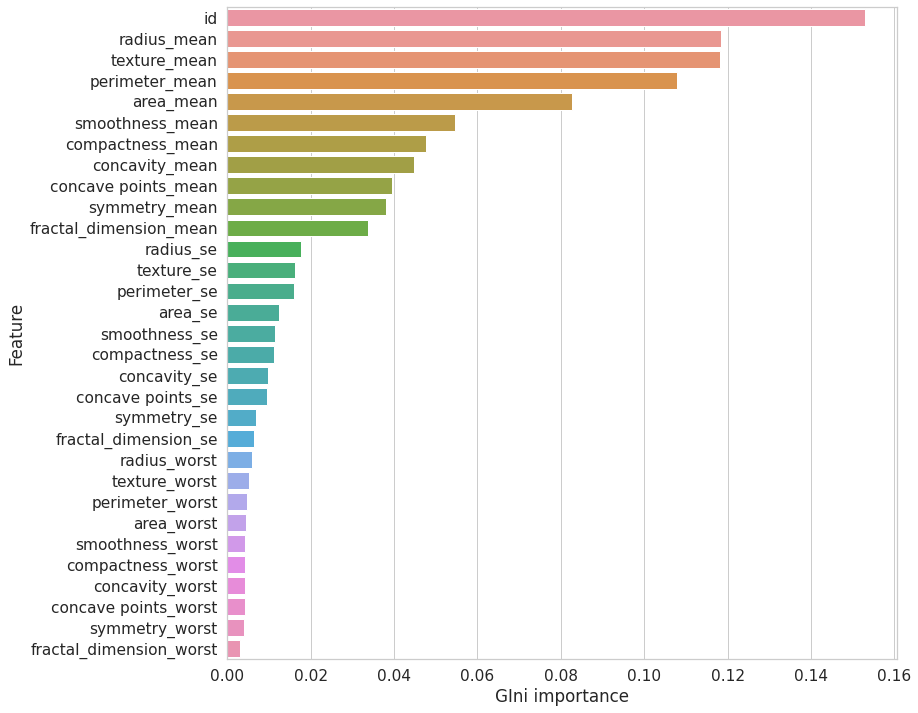

In [24]:
#feature importance

importance=forest.feature_importances_
indices=np.argsort(importance)[::-1]

feat_imp=pd.DataFrame({'Feature':list(x),
                      'GIni importance':importance[indices]})
plt.rcParams['figure.figsize']=(12,12)
sns.set_style('whitegrid')
ax=sns.barplot(x='GIni importance',y='Feature',data=feat_imp)
ax.set(xlabel="GIni importance")
plt.show()

In [57]:
#xg boost model
param={
    
    'n-estimators':[100,500,1000,2000],
}
FitModel(x,y,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[11:26:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n-estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'M']
Best Params :  {'n-estimators': 100}
Classification_report :                precision    recall  f1-score   support

           B       0.99      0.97      0.98        75
           M       0.95  

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_norm,y_norm)

In [38]:
y_res[0].value_counts()

1    357
0    357
Name: 0, dtype: int64

In [42]:
#trying for random forest again
np.random.seed(10)
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2)
forest=RandomForestClassifier(n_estimators=1000)
fit=forest.fit(x_train,y_train)
accuracy=fit.score(x_test,y_test)
pred=fit.predict(x_test)
cmatrix=confusion_matrix(y_test,pred)
print(cmatrix)
print("Classification_report : ",classification_report(y_test,pred))
print("Accuracy : ",accuracy)

<ipython-input-42-d07078d5cf78>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit=forest.fit(x_train,y_train)


[[67  1]
 [ 0 75]]
Classification_report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy :  0.993006993006993


In [43]:
#trying for svc again
#svm model 
param={  
    
            'C':[0.1,1,100,1000],
            'gamma':[0.0001,0.001,0.1,1,3,5]
    
        
       }

FitModel(x_res,y_res,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   12.7s


Best Params :  {'C': 1, 'gamma': 1}
Classification_report :                precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy_score : 0.986013986013986
Confusion Matrix : 
 [[66  2]
 [ 0 75]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished
/home/deepanshu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [53]:
#then fitting the xg boost as well
param={
    
    'n-estimators':[100,500,1000,2000],
}
FitModel(x_res,y_res,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[11:23:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n-estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
Best Params :  {'n-estimators': 100}
Classification_report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99  

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished
/home/deepanshu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
#selecting only top 15 features for making it more effcient
feat_imp.index=feat_imp.Feature

In [47]:
feat_to_keep=feat_imp.iloc[1:15].index

In [48]:
type(feat_to_keep),feat_to_keep

(pandas.core.indexes.base.Index,
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se'],
       dtype='object', name='Feature'))

In [49]:
x_res=pd.DataFrame(x_res)
y_res=pd.DataFrame(y_res)
x_res.columns=x_norm.columns

np.random.seed(10)
x_train,x_test,y_train,y_test=train_test_split(x_res[feat_to_keep],y_res,test_size=0.2)
forest=RandomForestClassifier(n_estimators=1000)
fit=forest.fit(x_train,y_train)
accuracy=fit.score(x_test,y_test)
pred=fit.predict(x_test)
cmatrix=confusion_matrix(y_test,pred)
print(cmatrix)
print("Classification_report : ",classification_report(y_test,pred))
print("Accuracy : ",accuracy)

<ipython-input-49-bc2bccea807a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit=forest.fit(x_train,y_train)


[[65  3]
 [ 1 74]]
Classification_report :                precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Accuracy :  0.972027972027972


In [60]:
#saving the best model here 
loaded_model=pickle.load(open("XGBoost",'rb'))